In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#track = pd.read_csv('tracks.csv')
#track.shape

In [4]:
#track.head(10)

In [5]:
#track[track ["Time Step"] == 'TRACK_ID'] 

In [6]:
ff_tracks=pd.read_csv('ff_trs_neg.new', sep=" ", header=None, names=["Time_Step", "Longitude", "Latitude", "Intensity"])
ff_tracks.head(10)

,Time_Step,Longitude,Latitude,Intensity
0,0,NaN,NaN,NaN
1,0,0.000000,NaN,NaN
2,TRACK_NUM,NaN,NaN,NaN
3,TRACK_ID,NaN,5.000000,START_TIME
4,POINT_NUM,NaN,13.000000,NaN
5,1979031600,58.657070,0.375274,2.301285e+00
6,1979031603,60.351276,0.503040,2.190975e+00
7,1979031606,62.055439,0.569541,2.085441e+00
8,1979031609,63.765503,0.585135,2.382643e+00
9,1979031612,62.047215,0.575213,2.611984e+00


In [7]:
#df = pd.read_csv('tracks.csv')
df2 = ff_tracks.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
#df2.groupby((df2['Time_Step']!=df2['Time_Step'].shift()).cumsum()).max().reset_index(drop=True)
#first= df2[3:7]
#df2.head(23)
#time_step=df2.Time_Step.values
#time_step
df2

,Time_Step,Longitude,Latitude,Intensity
0,0,0.000000,0.000000,0.000000
1,0,0.000000,0.000000,0.000000
2,0,0.000000,0.000000,0.000000
3,0,0.000000,5.000000,0.000000
4,0,0.000000,13.000000,0.000000
5,1979031600,58.657070,0.375274,2.301285
6,1979031603,60.351276,0.503040,2.190975
7,1979031606,62.055439,0.569541,2.085441
8,1979031609,63.765503,0.585135,2.382643
9,1979031612,62.047215,0.575213,2.611984


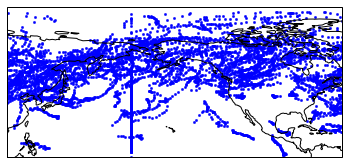

In [7]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='b',linewidth=0.5)

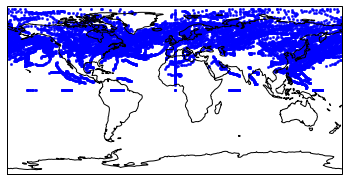

In [8]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
#ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='b',linewidth=0.5)

In [9]:
#df2 = df.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_global()
#ax.coastlines(linewidth=1, color='k')
#ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='b',linewidth=0.5)

#plt.show()

In [10]:
path = 'C:/Users/asoria/Documents/AOS 801/hgt.1974.nc'
ds = xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 365)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1974-01-01 1974-01-02 ... 1974-12-31
Data variables:
    hgt      (time, level, lat, lon) float32 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC Reanalysis (1974)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    history:        created 95/02/06 by Hoop (netCDF2.3)\nConverted to chunke...
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [11]:
longitude = ds['lon']
latitude = ds['lat']

In [12]:
longitude_mesh, latiude_mesh = np.meshgrid(longitude,latitude)

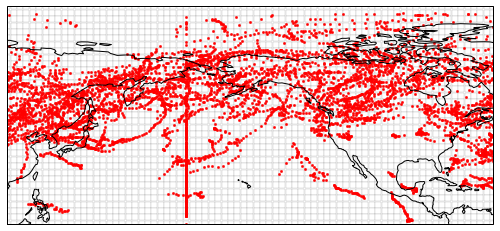

In [13]:
#import cartopy.crs as ccrs
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
ax.scatter(longitude_mesh,latiude_mesh, color='white', edgecolor='black', marker='s', linewidths=0.1)
ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='r',linewidth=0.5)

In [14]:
Lat_list = list(latiude_mesh.flatten())
Long_list = list(longitude_mesh.flatten())
counts = np.zeros(len(Lat_list))
counts

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:
time_step = df2.Time_Step.values
track_lon = df2.Longitude.values
track_lat = df2.Latitude.values
grid_lat = np.asarray(Lat_list)
grid_lon = np.asarray(Long_list)
counts_array = np.zeros((len(time_step),len(grid_lat)))

NameError: name 'Lat_list' is not defined

In [9]:
type(time_step)

numpy.ndarray

In [17]:
grid_lat[0:3]

array([90., 90., 90.], dtype=float32)

In [18]:
grid_lon[0:3]

array([0. , 2.5, 5. ], dtype=float32)

In [19]:
track_lat

array([ 0.      ,  0.      ,  0.      , ..., 30.670366, 30.592686,
       30.910095])

In [20]:
for i in range(len(time_step)):
    if time_step[i] == 0:
        grid_box_count = []
    else:
        distance = np.sqrt(((grid_lat - track_lat[i])**2) + ((grid_lon - track_lon[i])**2))
        distance_min_idx = np.where(distance==np.min(distance))[0][0]
        if distance_min_idx not in grid_box_count:
            counts_array[i,distance_min_idx] = counts_array[i,distance_min_idx]+1
            grid_box_count.append(distance_min_idx)

In [21]:
len(distance)

10512

In [22]:
distance_min_idx

3475

In [23]:
grid_box_count

[3909, 3910, 3765, 3620, 3475]

In [24]:
np.shape(counts_array)

(12506, 10512)

In [25]:
np.shape(Long_list)

(10512,)

In [26]:
np.shape(Lat_list)

(10512,)

In [27]:
counts_nan = counts_array.copy()
for i in range(len(counts_nan)):
    if counts_array[i]==0:
        counts_nan[i]==np.nan
counts_nan

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#counts_nan_2 = counts_nan.copy()
#for i in range(len(counts_nan_2)):
    #if counts_nan_2[i]==0:
        #counts_nan_2[i]=np.nan
#counts_nan_2

In [28]:
np.shape(counts_array)

(12506, 10512)

In [29]:
counts_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
np.mean(counts_array[5,:])

9.512937595129375e-05

In [31]:
count_array_sum = np.sum(counts_array,axis=0)
np.sum(count_array_sum)

6112.0

In [32]:
np.max(count_array_sum)

11.0

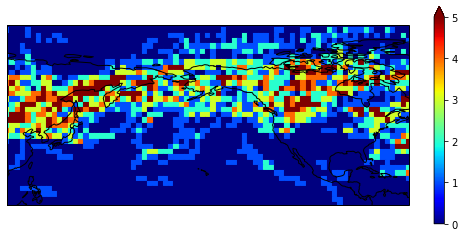

In [33]:
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
b = ax.scatter(Long_list,Lat_list, c=count_array_sum, marker='s', linewidths=0.1,cmap='jet',vmin=0,vmax=5)
plt.colorbar(b,extend='max');

In [34]:
cyclone_flag = []
for i in range(len(counts)):
    if count_array_sum[i] == 0:
        cyclone_flag.append(0)
    else:
        cyclone_flag.append(1)

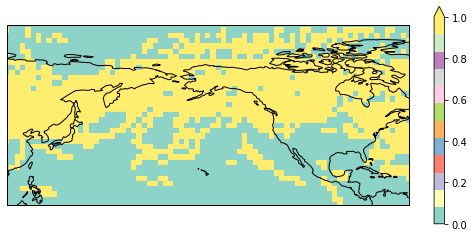

In [35]:
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
b = ax.scatter(Long_list,Lat_list, c=cyclone_flag, marker='s', linewidths=0.1,cmap='Set3')
plt.colorbar(b,extend='max');
#ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='r',linewidth=0.5)

In [36]:
#turn all the time steps into strings
num2= []
for i in range(len(time_step)):
    num2.append(str(time_step[i]))
num2[0:12]

['0',
 '0',
 '0',
 '0',
 '0',
 '1979031600',
 '1979031603',
 '1979031606',
 '1979031609',
 '1979031612',
 '1979031615',
 '1979031618']

In [37]:
#make new list of strings with only days and cut out hours
daily_time=[]
for i in range(len(num2)):
    if len(num2[i]) == 1:
        daily_time.append(num2[i])
    else:
        daily_time.append(num2[i][0:8])
#daily_time

In [38]:
#turn the list of days from strings to integers
daily_num = []
for i in range(len(daily_time)):
    daily_num.append(int(daily_time[i]))
#daily_num

In [11]:
#turn the list of days from integers to an array
#find only the unique days in the array
daily_array = np.asarray(daily_num)
unique_daily_array=np.unique(daily_array)

NameError: name 'daily_num' is not defined

In [10]:
len(unique_daily_array)

NameError: name 'unique_daily_array' is not defined

In [40]:
#turn unique days into strings
unique_daily_string= []
for i in range(len(unique_daily_array)):
    unique_daily_string.append(str(unique_daily_array[i]))
#unique_daily_string

In [41]:
#sum up all the hourly data to match its day 
counts = 0
match=[]
for i in range(len(unique_daily_string)):
    for j in range(len(num2)):
        if num2[j][:8]==unique_daily_string[i]:
            counts +=1
    match.append(counts)
    counts = 0

In [42]:
#turn the sums and their days into an array
#want the array to have 2 variables thats why we pull out 0 and 1
daily_counts_array = np.zeros((len(match),2))
daily_counts_array[:,0] = unique_daily_array
daily_counts_array[:,1] = match
np.set_printoptions(suppress=True)
#daily_counts_array

In [43]:
#turn the num2 string into floats
num3=[]
for i in range(len(num2)):
    if len(num2[i])==1:
        num3.append(float(num2[i]))
    else:
        num3.append(float(num2[i][:8]))
#num3

In [44]:
#daily_counts_array shows how many matches there are but daily_ind grabs 
#the index of those matches to grab their lat and lon
for x in range(len(unique_daily_array)):
    #unique_num3=np.unique(num3)
    for i in range(len(unique_num3[i])):
        distance = np.sqrt(((grid_lat - track_lat[daily_ind[i]])**2) + ((grid_lon - track_lon[daily_ind[i]])**2))
        distance_min_idx = np.where(distance==np.min(distance))[0][0]
    if distance_min_idx not in grid_box_count:
        counts_array[i,distance_min_idx] = counts_array[i,distance_min_idx]+1
        grid_box_count.append(distance_min_idx)

        
#need to match these indicies with their grid box (mesh grid for loop)
#sum all counts in each grid box
#can plot 3/1 that shows 48 different grid box, some may have 5 in one box
#lat lon map that shows counts in each grid box
#will need to loop through all the days (i) and save the info time,lat,lon 

IndexError: index 12505 is out of bounds for axis 0 with size 123

In [45]:
#unique_num3=np.unique(num3)
for i in range(len(unique_num3[i])):
    distance = np.sqrt(((grid_lat[unique_num3[i]] - track_lat[unique_num3[i]])**2) + ((grid_lon[unique_num3[i]] - track_lon[unique_num3[i]])**2))
    distance_min_idx = np.where(distance==np.min(distance))[0][0]
    if distance_min_idx not in grid_box_count:
        counts_array[i,distance_min_idx] = counts_array[i,distance_min_idx]+1
        grid_box_count.append(distance_min_idx)

IndexError: index 12505 is out of bounds for axis 0 with size 123

In [46]:
np.shape(counts_array)


(12506, 10512)

In [47]:
np.where(num3==unique_daily_array[1])

(array([ 20,  21,  22,  23,  24,  25,  26,  27, 103, 104, 105, 106, 107,
        108, 109, 110, 124, 125, 126, 127, 128, 129, 130, 131, 168, 169,
        170, 171, 172, 173, 174, 175, 200, 201, 202, 203, 204, 205, 206,
        207, 270, 271, 272, 273, 274, 275, 276, 317], dtype=int64),)

In [48]:

len(unique_daily_array)

123

In [49]:
unique_num3=np.unique(num3)
unique_num3

array([       0., 19790301., 19790302., 19790303., 19790304., 19790305.,
       19790306., 19790307., 19790308., 19790309., 19790310., 19790311.,
       19790312., 19790313., 19790314., 19790315., 19790316., 19790317.,
       19790318., 19790319., 19790320., 19790321., 19790322., 19790323.,
       19790324., 19790325., 19790326., 19790327., 19790328., 19790329.,
       19790330., 19790331., 19790401., 19790402., 19790403., 19790404.,
       19790405., 19790406., 19790407., 19790408., 19790409., 19790410.,
       19790411., 19790412., 19790413., 19790414., 19790415., 19790416.,
       19790417., 19790418., 19790419., 19790420., 19790421., 19790422.,
       19790423., 19790424., 19790425., 19790426., 19790427., 19790428.,
       19790429., 19790430., 19790501., 19790502., 19790503., 19790504.,
       19790505., 19790506., 19790507., 19790508., 19790509., 19790510.,
       19790511., 19790512., 19790513., 19790514., 19790515., 19790516.,
       19790517., 19790518., 19790519., 19790520., 

In [50]:
grid_lat

array([ 90.,  90.,  90., ..., -90., -90., -90.], dtype=float32)

In [51]:
#np.shape(daily_ind)

NameError: name 'daily_ind' is not defined

In [52]:
#i=0
#track_lat[len(daily_ind[i])]

In [53]:
#distance formula used to find closest grid point in the mesh grid that corresponds to the ds2 lat lon
#need to loop through only the indicies for the day
n = daily_ind[i]
for i in range(len(daily_ind[i])):
    distance = np.sqrt(((grid_lat - track_lat[i])**2) + ((grid_lon - track_lon[i])**2))
    distance_min_idx = np.where(distance==np.min(distance))[0][0]
    if distance_min_idx not in grid_box_count:
        counts_array[i,distance_min_idx] = counts_array[i,distance_min_idx]+1
        grid_box_count.append(distance_min_idx)

NameError: name 'daily_ind' is not defined

In [54]:
count_array_sum = np.sum(counts_array,axis=0)
np.sum(count_array_sum)

6112.0

In [55]:
#counts_array

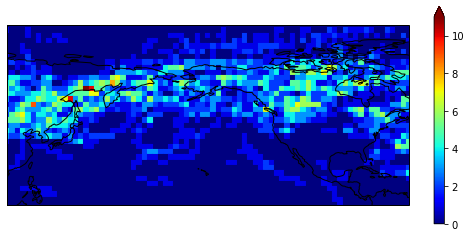

In [56]:
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
b = ax.scatter(Long_list,Lat_list, c=count_array_sum, marker='s', linewidths=0.1,cmap='jet')
plt.colorbar(b,extend='max');
#ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='r',linewidth=0.5)

In [57]:
#pick a day to plot
i=7
daily_ind_test= np.where(num3==unique_daily_array[i])
daily_ind_test[0]

array([  68,   69,   70,   71,   72,   73,   74,   75,  248,  249,  250,
        251,  252,  253,  254,  255,  372,  373,  374,  375,  376,  377,
        378,  379,  483,  484,  485,  486,  487,  488,  489,  490,  527,
        528,  529,  530,  531,  532,  533,  534,  617,  618,  619,  620,
        621,  622,  623,  624,  653,  654,  655,  656,  657,  658,  659,
        660,  697,  698,  699,  700,  701,  702,  703,  704,  740,  741,
        742,  743,  752,  753,  754,  755,  756,  757,  758,  759,  804,
        805,  806,  807,  808,  809,  810,  811, 1698, 1699, 1700, 1701,
       1702, 1703, 1704, 1705], dtype=int64)

In [58]:
for i in range(len(daily_ind_test[0])):
    distance = np.sqrt(((grid_lat - track_lat[i])**2) + ((grid_lon - track_lon[i])**2))
    distance_min_idx = np.where(distance==np.min(distance))[0][0]
    if distance_min_idx not in grid_box_count:
        counts_array[i,distance_min_idx] = counts_array[i,distance_min_idx]+1
        grid_box_count.append(distance_min_idx)

In [59]:
count_array_sum_test = np.sum(counts_array,axis=0)
np.sum(count_array_sum_test)

6167.0

In [60]:
cyclone_flag2 = []
for i in range(len(daily_ind[0])):
    if count_array_sum[i] == 0:
        cyclone_flag.append(0)
    else:
        cyclone_flag.append(1)

NameError: name 'daily_ind' is not defined

In [61]:
#cyclone_flag2 = []
#for i in range(len(count_array_sum)):
    #if count_array_sum[i] == 0:
        #cyclone_flag2.append(0)
    #else:
        #cyclone_flag2.append(1)

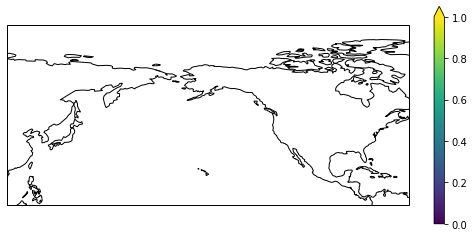

In [62]:
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
b = ax.scatter(Long_list,Lat_list, c=cyclone_flag2, marker='s', linewidths=0.1,cmap='Set3')
plt.colorbar(b,extend='max');
#ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='r',linewidth=0.5)

In [63]:
df2.tail()

,Time_Step,Longitude,Latitude,Intensity
12501,1979062403,46.883999,30.448132,10.368120
12502,1979062406,47.025558,30.434338,10.082370
12503,1979062409,46.732658,30.670366,9.501835
12504,1979062412,46.736969,30.592686,8.671929
12505,1979062415,46.429607,30.910095,8.666684


In [95]:
len(unique_daily_array)

123

In [96]:
np.shape(counts_array)

(12506, 10512)

In [97]:
num3[0:10]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 19790316.0,
 19790316.0,
 19790316.0,
 19790316.0,
 19790316.0]

In [98]:
counts_array_daily = np.zeros((len(unique_daily_array),len(grid_lat)))

In [99]:
for n in range(len(unique_daily_array)):
    for i in range(len(time_step)):
        if num3[i] == unique_daily_array[n]:
            counts_array_daily[n,:] = counts_array_daily[n,:] + counts_array[i,:]

In [112]:
new_counts_array_daily = np.copy(counts_array_daily)

In [124]:
#np.max(counts_array_daily[5,:])
for i in range(np.size(new_counts_array_daily,axis=0)):
    for j in range(np.size(new_counts_array_daily, axis=1)):
        if new_counts_array_daily[i,j]>1:
            new_counts_array_daily[i,j] = 1

In [125]:
np.where(new_counts_array_daily==2)

(array([], dtype=int64), array([], dtype=int64))

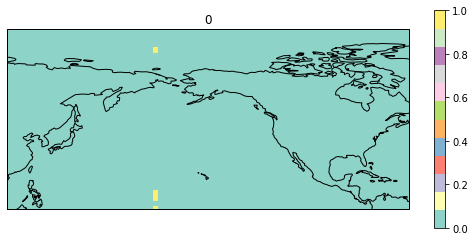

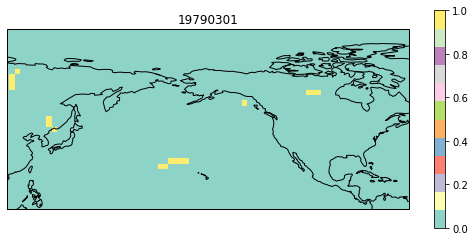

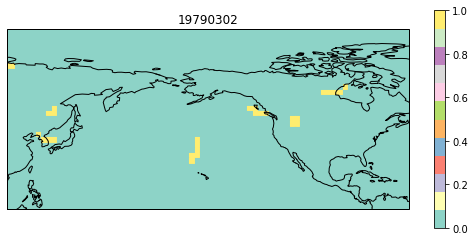

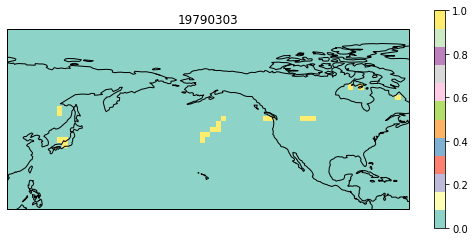

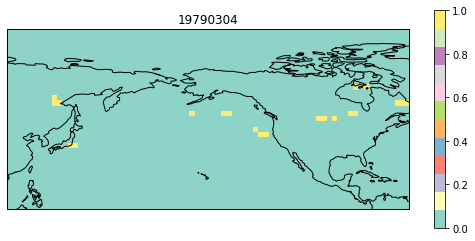

In [126]:
for i in range(5):
    f= plt.figure(figsize=(9,4))
    ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
    ax.coastlines(linewidth=1, color='k')
    plt.title(str(unique_daily_array[i]))
    b = ax.scatter(Long_list,Lat_list, c=new_counts_array_daily[i,:], marker='s', linewidths=0.1,cmap='Set3')
    plt.colorbar(b);
    #ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='r',linewidth=0.5)

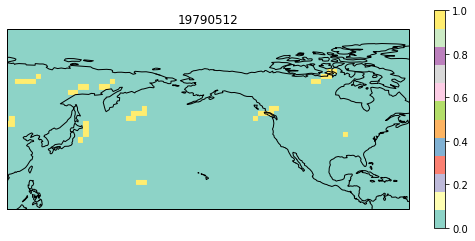

In [127]:
date = 19790512
date_idx = np.where(unique_daily_array==date)[0][0]
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
plt.title(str(unique_daily_array[date_idx]))
b = ax.scatter(Long_list,Lat_list, c=new_counts_array_daily[date_idx,:], marker='s', linewidths=0.1,cmap='Set3')
plt.colorbar(b);
#ax.scatter(df2.Longitude,df2.Latitude, s=20,marker='.',color='r',linewidth=0.5)

In [72]:
np.where(unique_daily_array==date)[0][0]

73

In [81]:
#took hourly data from the same day
#sum over each grid box
#123 days
#lat and lon map of all the sums
#divide by max possible number of storms 123
#
unique_daily_array

array([       0, 19790301, 19790302, 19790303, 19790304, 19790305,
       19790306, 19790307, 19790308, 19790309, 19790310, 19790311,
       19790312, 19790313, 19790314, 19790315, 19790316, 19790317,
       19790318, 19790319, 19790320, 19790321, 19790322, 19790323,
       19790324, 19790325, 19790326, 19790327, 19790328, 19790329,
       19790330, 19790331, 19790401, 19790402, 19790403, 19790404,
       19790405, 19790406, 19790407, 19790408, 19790409, 19790410,
       19790411, 19790412, 19790413, 19790414, 19790415, 19790416,
       19790417, 19790418, 19790419, 19790420, 19790421, 19790422,
       19790423, 19790424, 19790425, 19790426, 19790427, 19790428,
       19790429, 19790430, 19790501, 19790502, 19790503, 19790504,
       19790505, 19790506, 19790507, 19790508, 19790509, 19790510,
       19790511, 19790512, 19790513, 19790514, 19790515, 19790516,
       19790517, 19790518, 19790519, 19790520, 19790521, 19790522,
       19790523, 19790524, 19790525, 19790526, 19790527, 19790

In [128]:
frequency=(np.sum(new_counts_array_daily,axis=0)/122)*100
np.max(frequency)

9.01639344262295

In [119]:
np.shape(longitude_mesh)

(73, 144)

In [120]:
frequency_mesh = frequency.reshape([73,144])

Text(0.5, 1.0, 'Frequency Scatter Plot')

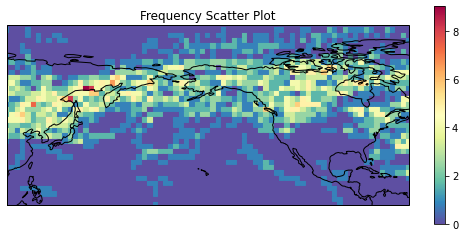

In [130]:
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
b = ax.scatter(Long_list,Lat_list, c=frequency, marker='s', linewidths=0.1,cmap='Spectral_r')
plt.colorbar(b);
plt.title('Frequency Scatter Plot')

Text(0.5, 1.0, 'Frequency Contour Plot')

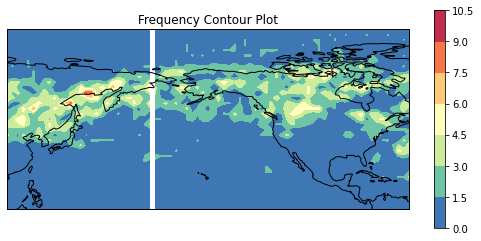

In [131]:
f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
ax.coastlines(linewidth=1, color='k')
#plt.title(str(unique_daily_array[i]))
b = ax.contourf(longitude_mesh,latiude_mesh, frequency_mesh,cmap='Spectral_r')
plt.colorbar(b);
plt.title('Frequency Contour Plot')

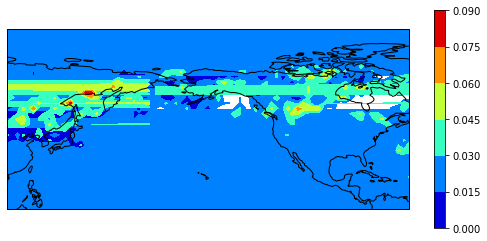

In [79]:
from cartopy.util import add_cyclic_point

f= plt.figure(figsize=(9,4))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([110, 300, 5, 120], crs=ccrs.PlateCarree())
#e1_c, lons_c = add_cyclic_point(frequency_mesh,coord=Long_list)
e1_c = add_cyclic_point(frequency_mesh)
lons_c = add_cyclic_point(longitude_mesh)
lats_c = add_cyclic_point(latiude_mesh)
ax.coastlines(linewidth=1, color='k')
#plt.title(str(unique_daily_array[i]))
b = ax.contourf(lons_c,lats_c, e1_c,cmap='jet')
plt.colorbar(b);